# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

In [4]:
n = 64
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n)

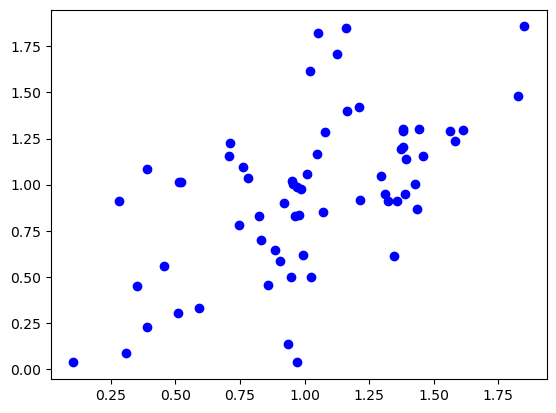

In [13]:
plt.scatter(x.T[0],y, c = "blue")

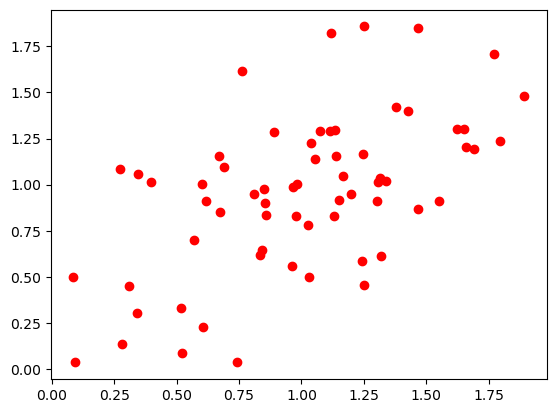

In [14]:
plt.scatter(x.T[1],y, c = "red")

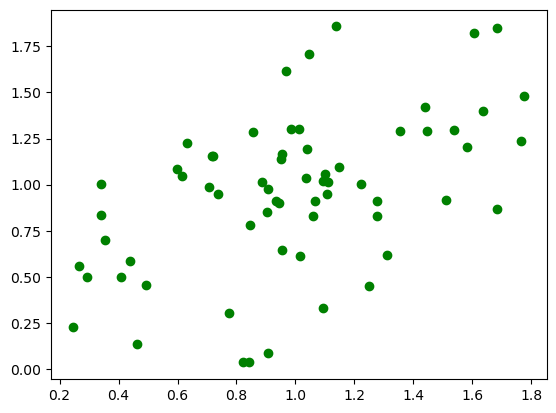

In [15]:
plt.scatter(x.T[2],y, c = "green")

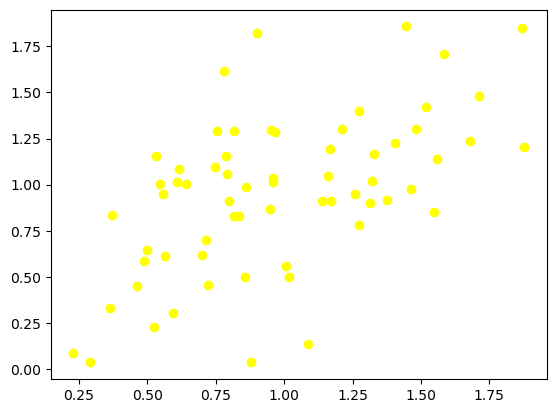

In [16]:
plt.scatter(x.T[3],y, c = "yellow")

## 2.  Create a Linear Regression model (LIKE WE DID IN CLASS) to fit the data. *Use the example from Lesson 3 and DO NOT USE a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), calculate a new column $y_p=\Sigma\beta_n\cdot x_n$ 

$\beta = (X^T X)^{-1} Y^T X$

In [22]:
left  = np.linalg.inv(np.dot(x.T, x)) # Just showing the by hand method
right = np.dot(y.T, x)
np.dot(left, right)

array([0.26360319, 0.13727859, 0.24396712, 0.26238594, 0.04789135])

In [23]:
beta = np.linalg.lstsq(x,y,rcond=None)[0] # Got a warning that didn't entirely make sense; remove rcond to see it
beta

array([0.26360319, 0.13727859, 0.24396712, 0.26238594, 0.04789135])

In [28]:
y_pred = np.dot(x, beta) # I know the question implies a single column but this math makes 5
y_pred

array([0.36952917, 0.83677403, 0.77686919, 0.65430735, 0.60382323,
       0.4822258 , 0.62880784, 0.76118452, 0.7315866 , 0.4315507 ,
       0.83790944, 0.82024312, 0.63613028, 0.57367806, 0.90819419,
       0.49570087, 0.67750482, 0.60820225, 0.75519312, 0.61900206,
       0.60941138, 0.83260192, 0.66774922, 0.64009178, 0.95067922,
       1.00381411, 0.69162493, 0.9278044 , 0.91733898, 0.90061287,
       1.07651445, 0.97998747, 1.11082255, 0.92644363, 0.83044965,
       0.93829559, 1.09601861, 1.30534116, 1.02593861, 1.20055023,
       1.0497504 , 0.86340068, 0.8346136 , 0.97149528, 1.25596771,
       0.98276486, 1.18550525, 1.15650348, 1.25302432, 1.02901105,
       1.20221377, 1.21995515, 1.15361967, 1.28726524, 1.26442715,
       1.10639379, 1.58258207, 1.17895158, 1.45583387, 1.67127802,
       1.25825194, 1.36388241, 1.51754147, 1.28272578])

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

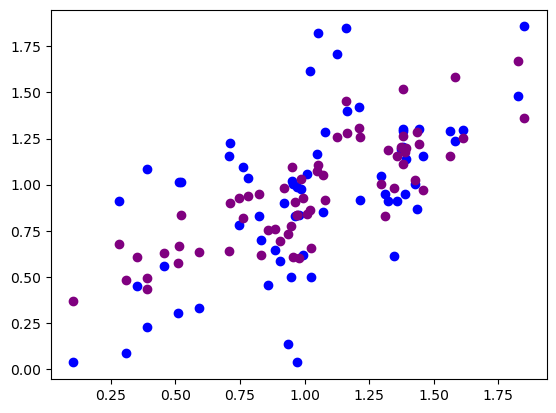

In [29]:
plt.scatter(x.T[0], y, c = "blue")
plt.scatter(x.T[0], y_pred, c = "purple")

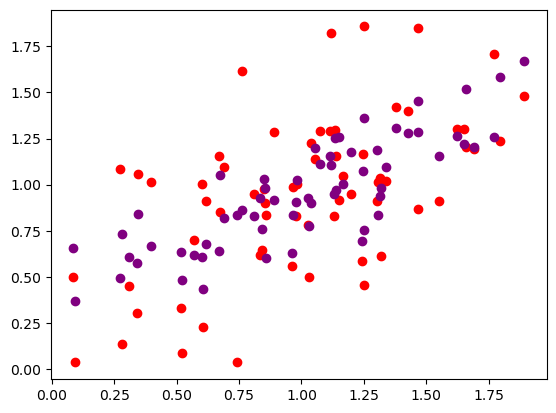

In [30]:
plt.scatter(x.T[1], y, c = "red")
plt.scatter(x.T[1], y_pred, c = "purple")

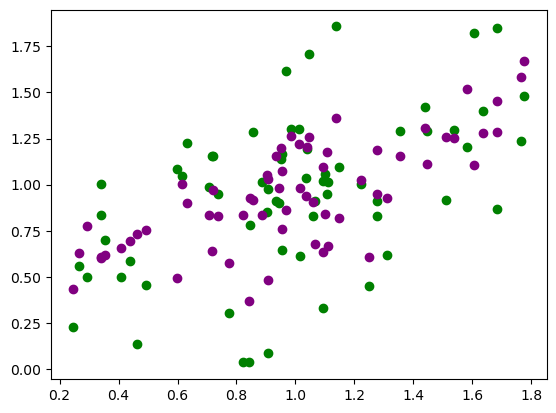

In [31]:
plt.scatter(x.T[2], y, c = "green")
plt.scatter(x.T[2], y_pred, c = "purple")

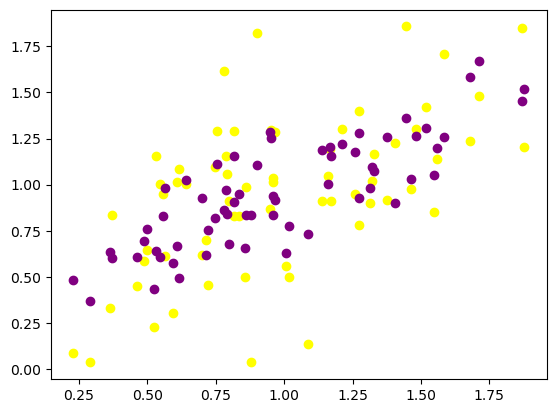

In [32]:
plt.scatter(x.T[3], y, c = "yellow")
plt.scatter(x.T[3], y_pred, c = "purple")

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [33]:
import pandas as pd
import numpy as np
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [44]:
columns = ['Income', 'Limit', "Balance", "Education"]
X = credit[columns].values

X = np.vstack([X.T, np.ones(len(X))]).T
X

array([[1.48910e+01, 3.60600e+03, 3.33000e+02, 1.10000e+01, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 9.03000e+02, 1.50000e+01, 1.00000e+00],
       [1.04593e+02, 7.07500e+03, 5.80000e+02, 1.10000e+01, 1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 1.38000e+02, 1.20000e+01, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 0.00000e+00, 1.30000e+01, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 9.66000e+02, 7.00000e+00, 1.00000e+00]])

In [45]:
Y = credit['Rating']
Y

0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

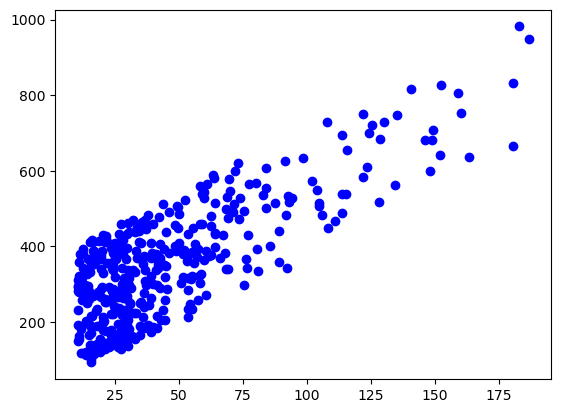

In [46]:
plt.scatter(X.T[0], Y, c = "blue")

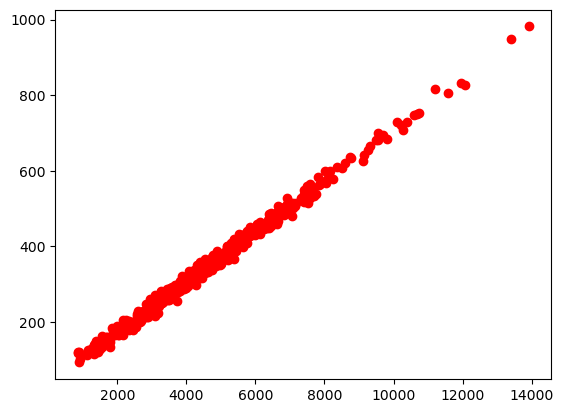

In [47]:
plt.scatter(X.T[1], Y, c = "red")

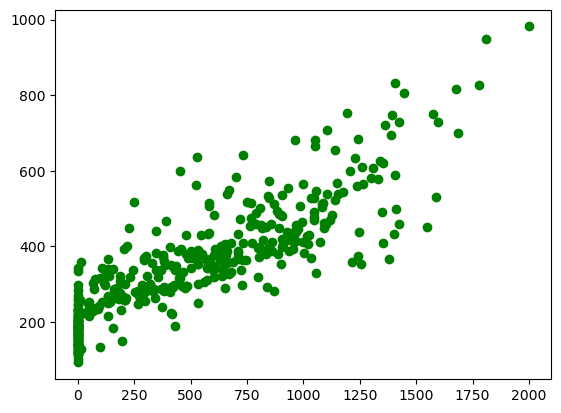

In [48]:
plt.scatter(X.T[2], Y, color = "green")

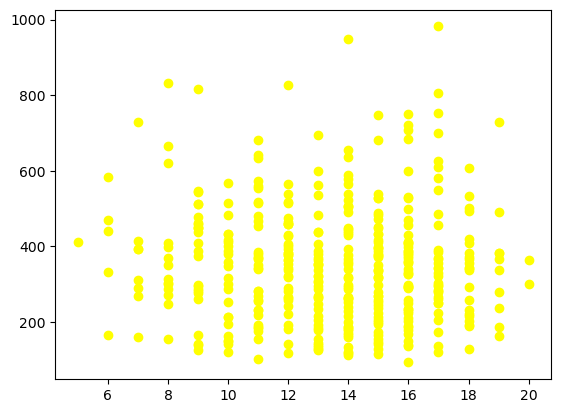

In [49]:
plt.scatter(X.T[3], Y, color = "yellow")